In [2]:
%pip install torchviz

  Preparing metadata (setup.py) ... done
  Obtaining dependency information for graphviz from https://files.pythonhosted.org/packages/00/be/d59db2d1d52697c6adc9eacaf50e8965b6345cc143f671e1ed068818d5cf/graphviz-0.20.3-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 813.5 kB/s eta 0:00:00B/s eta 0:00:01
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4132 sha256=6c85894deedb7af82edfde7049f143ae35c924a78a8a2b35551be607c17e9df3
  Stored in directory: /home/ezipe/.cache/pip/wheels/5a/d0/3f/b7014553eb74f12892b7d9b69c6083044564712d10fde8dfdc
Successfully built torchviz
Note: you may need to restart the kernel to use updated packages.


In [74]:
pg.exp()

tensor([15.1543, 15.1543], grad_fn=<ExpBackward0>)

In [77]:
import torch
from torchviz import make_dot

lr = 100.

# initialization
theta = torch.tensor(torch.ones(2), requires_grad=True)
theta_prime = theta.clone().detach()
theta_prime.requires_grad = True

eta = torch.tensor(torch.ones((3)), requires_grad=True)
# eta = torch.nn.Parameter(torch.tensor([1.], requires_grad=True))

# update theta_prime w.r.t some pg loss
pg = (eta.sum() * theta_prime).sum()
pg.backward()
theta_prime = theta_prime + lr * theta_prime.grad 
eta.grad.zero_() # remove the gradient from eta
eta.requires_grad = True

# theta.grad is nothing here because we called detach
pg = (eta.mean() * theta).sum().exp()

dl_dtheta = torch.autograd.grad(pg, theta, create_graph=True)[0]
theta_hat = theta + lr * dl_dtheta

# # calculate the meta loss
incentive_loss = theta_hat.sum()
cost_loss = eta.sum() * 10
loss = incentive_loss + cost_loss
loss.backward()
eta = eta + lr * eta.grad

# # sync theta to theta_hat
theta = theta_hat.clone().detach()
dot = make_dot(loss, params=dict(eta=eta, theta=theta, theta_prime=theta_prime, loss=loss))

dot.render("pg_with_exp", format="png")

/tmp/ipykernel_442945/3416601274.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  theta = torch.tensor(torch.ones(2), requires_grad=True)
/tmp/ipykernel_442945/3416601274.py:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  eta = torch.tensor(torch.ones((3)), requires_grad=True)


'pg_with_exp.png'

In [78]:
import torch
from torchviz import make_dot

lr = 100.

# initialization
theta = torch.tensor(torch.ones(2), requires_grad=True)
theta_prime = theta.clone().detach()
theta_prime.requires_grad = True

eta = torch.tensor(torch.ones((3)), requires_grad=True)
# eta = torch.nn.Parameter(torch.tensor([1.], requires_grad=True))

# update theta_prime w.r.t some pg loss
pg = (eta.sum() * theta_prime).sum()
pg.backward()
theta_prime = theta_prime + lr * theta_prime.grad 
eta.grad.zero_() # remove the gradient from eta
eta.requires_grad = True

# theta.grad is nothing here because we called detach
pg = (eta.mean() * theta).sum()

dl_dtheta = torch.autograd.grad(pg, theta, create_graph=True)[0]
theta_hat = theta + lr * dl_dtheta

# # calculate the meta loss
incentive_loss = theta_hat.sum()
cost_loss = eta.sum() * 10
loss = incentive_loss + cost_loss
loss.backward()
eta = eta + lr * eta.grad

# # sync theta to theta_hat
theta = theta_hat.clone().detach()
dot = make_dot(loss, params=dict(eta=eta, theta=theta, theta_prime=theta_prime, loss=loss))
dot.render("pg_without_exp", format="png")

/tmp/ipykernel_442945/1917990666.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  theta = torch.tensor(torch.ones(2), requires_grad=True)
/tmp/ipykernel_442945/1917990666.py:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  eta = torch.tensor(torch.ones((3)), requires_grad=True)


'pg_without_exp.png'

In [39]:
eta.grad

/tmp/ipykernel_442945/873365187.py:1: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at aten/src/ATen/core/TensorBody.h:489.)
  eta.grad


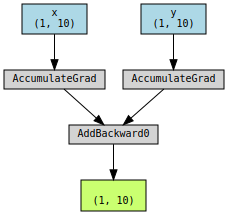

In [4]:
import torch
from torchviz import make_dot


x = torch.randn(1, 10, requires_grad=True)

y = torch.randn(1, 10, requires_grad=True)

z = x + y

make_dot(z, params={"x": x, "y": y})